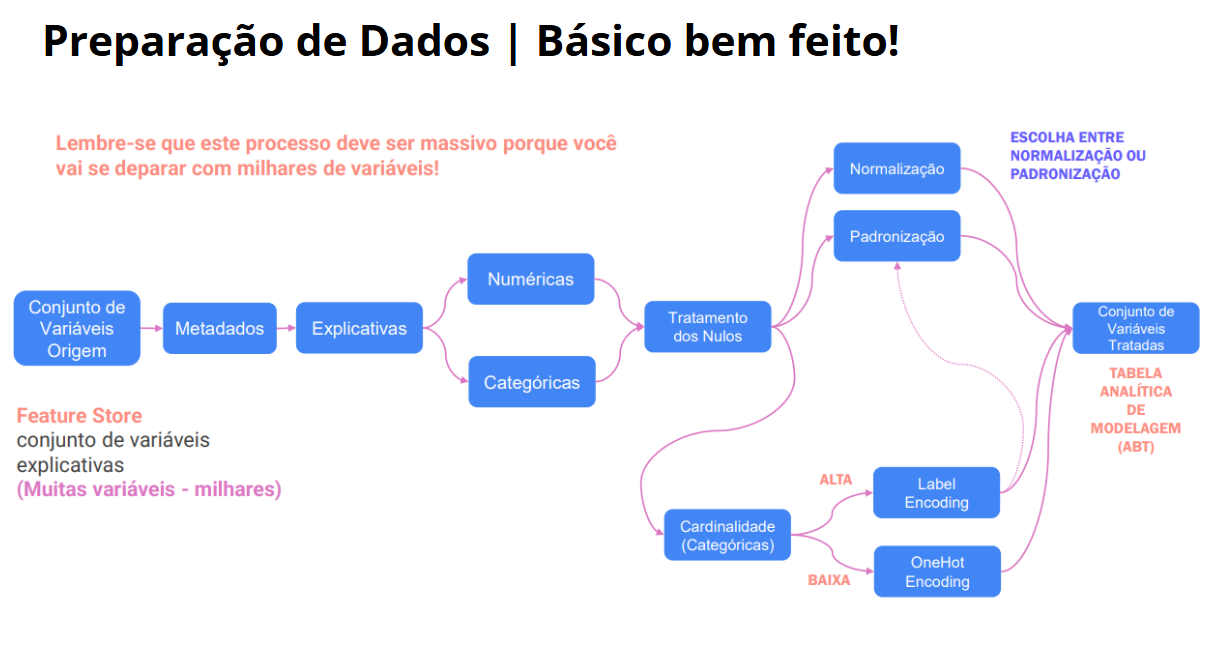

### Vamos ler os dados originais do problema

In [1]:
import pandas as pd

abt_00_telcos = pd.read_csv('/content/drive/Shareddrives/PoD Academy/Semana da Ciência de Dados/2025/Dados/abt_00_telcos.csv')

abt_00_telcos.shape

(7043, 21)

In [5]:
abt_00_telcos.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [6]:
abt_00_telcos.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,0.265370
std,0.368612,24.559481,30.090047,2266.771362,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.850000,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [7]:
metadados = pd.read_csv('/content/drive/Shareddrives/PoD Academy/Semana da Ciência de Dados/2025/Dados/metadados_telcos.csv')
metadados

,variavel,tipo,n_nulos,pct_nulos,cardinalidade
0,customerID,categorica,0,0.00,7043.0
1,gender,categorica,0,0.00,2.0
2,SeniorCitizen,numerica,0,0.00,NaN
3,Partner,categorica,0,0.00,2.0
4,Dependents,categorica,0,0.00,2.0
5,tenure,numerica,0,0.00,NaN
6,PhoneService,categorica,0,0.00,2.0
7,MultipleLines,categorica,0,0.00,3.0
8,InternetService,categorica,0,0.00,3.0
9,OnlineSecurity,categorica,0,0.00,3.0


##Imports e parâmetros gerais

In [ ]:
# ===== 0) Imports e parâmetros =====
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
import joblib, os

# parâmetros que você pode ajustar
TARGET_COL = "Churn"
ID_COLS = [c for c in ["customerID","CustomerID","customer_id"] if c in abt_00_telcos.columns]

# decisão entre normalização e padronização
ESCALA_NUMERICA = "padronizacao"  # opções: "padronizacao" (StandardScaler) ou "normalizacao" (MinMaxScaler)

# limiar para separar categóricas de baixa vs alta cardinalidade
LIMIAR_CARDINALIDADE = 12

# cria diretório para salvar artefatos
os.makedirs("artifacts_prep", exist_ok=True)

## Variáveis Explicativas

In [ ]:
# ===== 2) Seleção de variáveis explicativas =====
colunas_explicativas = [c for c in abt_00_telcos.columns if c not in ID_COLS + [TARGET_COL]]
print("Nº de explicativas:", len(colunas_explicativas))
colunas_explicativas[:10]

Nº de explicativas: 19


['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup']

## Separação: Numéricas vs Categóricas

In [ ]:
# ===== 3) Particionamento Numéricas x Categóricas =====
tipo_map = dict(zip(metadados["variavel"], metadados["tipo"]))
num_cols = [c for c in colunas_explicativas if tipo_map.get(c) == "numerica"]
cat_cols = [c for c in colunas_explicativas if tipo_map.get(c) == "categorica"]

print("Numéricas:", len(num_cols), " | Categóricas:", len(cat_cols))
print("Exemplo num:", num_cols[:8])
print("Exemplo cat:", cat_cols[:8])


Numéricas: 4  | Categóricas: 15
Exemplo num: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Exemplo cat: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup']


## Tratamento dos Nulos

In [ ]:
# ===== 4) Transformadores de imputação =====
imputer_num = SimpleImputer(strategy="median")
imputer_cat = SimpleImputer(strategy="most_frequent")

## Cardinalidade (categóricas) → Alta vs Baixa

In [ ]:
# ===== 5) Cardinalidade (Alta x Baixa) =====
card = dict(zip(metadados["variavel"], metadados["cardinalidade"]))
cat_baixa = [c for c in cat_cols if (card.get(c, 0) <= LIMIAR_CARDINALIDADE)]
cat_alta  = [c for c in cat_cols if (card.get(c, 0) >  LIMIAR_CARDINALIDADE)]

print("Categóricas baixa cardinalidade:", len(cat_baixa))
print("Categóricas alta cardinalidade:", len(cat_alta))

Categóricas baixa cardinalidade: 15
Categóricas alta cardinalidade: 0


## Label Encoding para Alta Cardinalidade

In [ ]:
# ===== 6) Label Encoding para alta cardinalidade =====
from sklearn.preprocessing import OrdinalEncoder

ordinal_alta = OrdinalEncoder(
    handle_unknown="use_encoded_value",  # lida com categorias novas no deploy
    unknown_value=-1,                    # código para "desconhecido"
    encoded_missing_value=-1             # nulos após imputação (se restarem)
)

## One-Hot Encoding para Baixa Cardinalidade

In [ ]:
# ===== 7) One-Hot para baixa cardinalidade =====
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

## Normalização / Padronização (escolha para numéricos)

In [ ]:
# ===== 8) Escala numérica: normalização ou padronização =====
if ESCALA_NUMERICA == "padronizacao":
    scaler_num = StandardScaler()
elif ESCALA_NUMERICA == "normalizacao":
    scaler_num = MinMaxScaler()
else:
    raise ValueError("ESCALA_NUMERICA deve ser 'padronizacao' ou 'normalizacao'")


## Conjunto de Variáveis Tratadas (pré-processamento completo)

In [ ]:
# ===== 9) Pré-processador (ColumnTransformer) =====
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Numéricas: imputação + escala
pipe_num = Pipeline([
    ("imputer_num", SimpleImputer(strategy="median")),
    ("scaler", scaler_num),
])

# Categóricas baixa: imputação + One-Hot
pipe_cat_baixa = Pipeline([
    ("imputer_cat", SimpleImputer(strategy="most_frequent")),
    ("ohe", ohe),
])

# Categóricas alta: imputação + Label/Ordinal Encoding
pipe_cat_alta = Pipeline([
    ("imputer_cat", SimpleImputer(strategy="most_frequent")),
    ("ordinal", ordinal_alta),
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", pipe_num, num_cols),
        ("cat_low", pipe_cat_baixa, cat_baixa),
        ("cat_high", pipe_cat_alta, cat_alta),
    ],
    remainder="drop"
)

preprocess

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer_num',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['SeniorCitizen', 'tenure', 'MonthlyCharges',
                                  'TotalCharges']),
                                ('cat_low',
                                 Pipeline(steps=[('imputer_cat',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['ge...
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod']),
                                ('cat_high',
                                 Pipeline(steps=[('imputer_cat',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal',
                                                  OrdinalEncoder(encoded_missing_value=-1,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 [])])

## Aplicado o data prep na base de treino e na base de teste (como artefato de implantação)

In [ ]:
# ===== 10) Split e geração de ABT =====
X = abt_00_telcos[colunas_explicativas].copy()
y = abt_00_telcos[TARGET_COL].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# fit / transform
ABT_train = preprocess.fit_transform(X_train)
ABT_test  = preprocess.transform(X_test)


print("ABT train:", ABT_train.shape, "| ABT test:", ABT_test.shape)

ABT train: (5634, 45) | ABT test: (1409, 45)


## Nomes das colunas após o processamento (útil para explicabilidade)

In [ ]:
# ===== 11) Recuperar nomes das features transformadas =====
feature_names = []

# 11.1) numéricas
feature_names += num_cols

# 11.2) OHE (baixa cardinalidade)
ohe_names = []
if len(cat_baixa):
    ohe_names = preprocess.named_transformers_["cat_low"] \
        .named_steps["ohe"].get_feature_names_out(input_features=cat_baixa).tolist()
feature_names += ohe_names

# 11.3) alta cardinalidade com OrdinalEncoder → 1 coluna por variável original
feature_names += cat_alta

print("Total de features:", len(feature_names))

Total de features: 45


In [ ]:
feature_names

['SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'gender_Female',
 'gender_Male',
 'Partner_No',
 'Partner_Yes',
 'Dependents_No',
 'Dependents_Yes',
 'PhoneService_No',
 'PhoneService_Yes',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_No',
 'PaperlessBilling_Yes',
 'PaymentMethod_Bank tran

## Persistência dos artefatos

In [ ]:
# ===== 12) Persistir artefatos =====
joblib.dump({
    "preprocess": preprocess,
    "feature_names": feature_names,
    "num_cols": num_cols,
    "cat_baixa": cat_baixa,
    "cat_alta": cat_alta,
    "params": {
        "ESCALA_NUMERICA": ESCALA_NUMERICA,
        "LIMIAR_CARDINALIDADE": LIMIAR_CARDINALIDADE,
        "TARGET_COL": TARGET_COL,
        "ID_COLS": ID_COLS
    }
}, "/content/drive/Shareddrives/PoD Academy/Semana da Ciência de Dados/2025/Dados/preprocess_telco.joblib")

joblib.dump((ABT_train, ABT_test, y_train.values, y_test.values), "/content/drive/Shareddrives/PoD Academy/Semana da Ciência de Dados/2025/Dados/abt_split.joblib")

print("Artefatos salvos em artifacts_prep/:")
print(" - preprocess_telco.joblib")
print(" - abt_split.joblib")

Artefatos salvos em artifacts_prep/:
 - preprocess_telco.joblib
 - abt_split.joblib


## Vamos comparar a base antes e depois do dataprep

In [ ]:
abt_00_telcos.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [ ]:
# ===== Transformar a base inteira com o preprocess =====
X_prep = preprocess.fit_transform(abt_00_telcos)

# Converter para DataFrame com nomes das features
X_prep_df = pd.DataFrame(X_prep, columns=feature_names)

# Visualizar amostra
X_prep_df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.439916,-1.277445,-1.160323,-0.994242,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.439916,0.066327,-0.259629,-0.173244,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.439916,-1.236724,-0.362660,-0.959674,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.439916,0.514251,-0.746535,-0.194766,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,-0.439916,-1.236724,0.197365,-0.940470,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


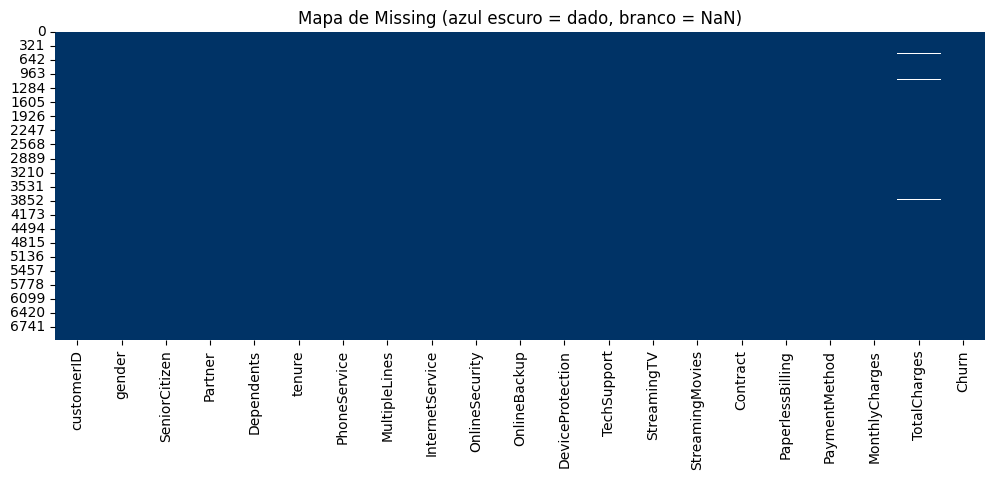

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
sns.heatmap(
    abt_00_telcos.isna(),
    cbar=False,
    cmap=["#003366", "white"]  # azul escuro = dados, branco = missing
)
plt.title("Mapa de Missing (azul escuro = dado, branco = NaN)", fontsize=12)
plt.show()